In [ ]:
"""
want to impliment some quantity that measures overfitting


"""



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import xgboost

from functions import make_dataset

from functions import make_portfolio

from sklearn.utils import shuffle

import time

import pickle

In [116]:
features1 = pd.read_pickle("training_sets/features1")

In [117]:
Date1 = np.load("training_sets/Date1.npy", allow_pickle = True)

In [118]:
Tickers1 = np.load("training_sets/Tickers1.npy", allow_pickle = True)

In [2]:
features2 = pd.read_pickle("training_sets/features2")

In [3]:
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)

In [4]:
Tickers2 = np.load("training_sets/Tickers2.npy", allow_pickle = True)

In [123]:
features3 = pd.read_pickle("training_sets/features3")

In [124]:
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [125]:
Tickers3 = np.load("training_sets/Tickers3.npy", allow_pickle = True)

In [2]:
with open('Training_window_test/top_50.pkl', 'rb') as f:
    top_50 = pickle.load(f)

In [6]:
cols = np.random.choice(top_50, 15, replace = False)

In [7]:
cols

array(['CMO_120', 'close_80/Close_320',
       'Shares (Diluted)/Shares (Basic)_QC', 'ADX_1_11',
       'close_120/Close_160', 'volstd_240', 'EV/FCF',
       'Accounts & Notes Receivable/Revenue', 'Cost of Revenue_QC',
       'Total Current Assets/Total Assets_YC', 'ABAND_signal_20',
       'close_0/Close_360', 'Price to Earnings Ratio (quarterly)_QC',
       'Total Assets/Share Capital & Additional Paid-In Capital_QC',
       'Retained Earnings/Total Liabilities', 'RSI_112',
       'Free Cash Flow/Revenue_YC', 'RSI_56',
       'Price to Sales Ratio (quarterly)', 'ABAND_indicator_10',
       'Book to Market Value', 'Enterprise Value/EBITDA_YC',
       'Free Cash Flow/Shares Outstanding', 'close_20/Close_120',
       'RSI_14'], dtype='<U58')

In [8]:
def make_dataset_eval(df, training_window, prediction_window, eval_size, prediction_date_number, Date_array, cols, pred_col):
    
    training_period = Date_array[prediction_date_number - training_window - prediction_window + 1: prediction_date_number - prediction_window +1]

    prediction_period = Date_array[prediction_date_number :prediction_date_number + eval_size + 1]
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    X_test = shuffle(df.loc[prediction_period, np.append(cols, pred_col)])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test = X_test.pop(pred_col)
    
    return X_train, X_test, Y_train, Y_test

In [9]:
def make_dataset_eval_with_extra_return_40_term(df, training_window, prediction_window, eval_size, prediction_date_number, Date_array, cols, pred_col):
    
    training_period = Date_array[prediction_date_number - training_window - prediction_window + 1: prediction_date_number - prediction_window +1]

    prediction_period = Date_array[prediction_date_number :prediction_date_number + eval_size + 1]
    
    X_train = shuffle(df.loc[training_period, np.append(cols, pred_col)])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(np.append(cols, pred_col), "return_40")])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test = X_test.pop(pred_col)
    Y_return_40 = X_test.pop("return_40")
    
    return X_train, X_test, Y_train, Y_test, Y_return_40

In [10]:
def make_dataset_eval_with_extra_return_40_term_and_multi_and_previous_set(df, training_window, prediction_window, eval_size, prediction_date_number, Date_array, cols, pred_col):
    
    training_period = Date_array[prediction_date_number - training_window - prediction_window + 1: prediction_date_number - prediction_window +1]

    prediction_period = Date_array[prediction_date_number :prediction_date_number + eval_size + 1]
    
    previous_eval_period = Date_array[prediction_date_number - training_window - prediction_window + 1 - eval_size :prediction_date_number - training_window - prediction_window + 1]
    
    X_train = shuffle(df.loc[training_period, np.append(np.append(cols, pred_col), ["return_40", "Class_multi_40_20"])])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    Y_train_return_40 = X_train.pop("return_40")
    Y_train_multi = X_train.pop("Class_multi_40_20")
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(np.append(cols, pred_col), ["return_40", "Class_multi_40_20"])])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test = X_test.pop(pred_col)
    Y_test_return_40 = X_test.pop("return_40")
    Y_test_multi = X_test.pop("Class_multi_40_20")
    
    X_prev = shuffle(df.loc[previous_eval_period, np.append(np.append(cols, pred_col), ["return_40", "Class_multi_40_20"])])
    X_prev = X_prev.replace([np.inf, -np.inf], np.NaN)
    X_prev = X_prev.dropna(axis = 0)
    
    Y_prev = X_prev.pop(pred_col)
    Y_prev_return_40 = X_prev.pop("return_40")
    Y_prev_multi = X_prev.pop("Class_multi_40_20")
    
    
    
    return X_train, X_test, X_prev, Y_train, Y_test, Y_prev, Y_train_return_40, Y_test_return_40, Y_prev_return_40, Y_train_multi, Y_test_multi, Y_prev_multi

In [ ]:
"""
which eval metrics to use?

return 40's on portfolio 25/100/1000

distribution of classes in portfolio 25/100/1000





roc/ auc? average precision index
logloss?/mlogloss?

for imbalanced classes a few suggestions:
Precision and recall
kappa
F1 score
G measure
Jaccard index

I think we should also go look at an overtrained tree and a nearly overtrained tree and a very basic tree and try and see any differences




"""

In [ ]:
"""
metric idea: (similar to AUC)

the most important thing is how we classify 0's and  in order of importance we have:
Classifiying a 1(or bad class) as a 0 (this should aim to be v low)
Classifiying a 0 as a 0 (This should aim to be v high)
classifiying a 0 as a 1 (This should aim to be low)
classifiying a 1 as a 1 (this should aim to be high)


so metric one should be: Class 1 as 0 / (class 1 as 0 + class 1 as 1)
metric two should be: Class 0 as 0 / (class 0 as 0 + class 0 as 1)

# we can try first with 25 diff percentiles

after testing:

ultimately what we care about is the ratio of 0 as 0 / 1 as 0, for which we want to maximise
we should just eval this

"""

In [3]:
Date1 = np.load("training_sets/Date1.npy", allow_pickle = True)
Date2 = np.load("training_sets/Date2.npy", allow_pickle = True)
Date3 = np.load("training_sets/Date3.npy", allow_pickle = True)

In [4]:
Dates = np.append(np.append(Date1, Date2), Date3)

In [4]:
375 + 235

610

In [19]:
prediction_dates = np.linspace(610, len(Dates) - 80, 15).astype(int)

In [20]:
prediction_dates

array([ 610,  727,  845,  962, 1080, 1198, 1315, 1433, 1551, 1668, 1786,
       1904, 2021, 2139, 2257])

In [21]:
prediction_dates = (prediction_dates + 50)[:-1]

In [22]:
prediction_dates

array([ 660,  777,  895, 1012, 1130, 1248, 1365, 1483, 1601, 1718, 1836,
       1954, 2071, 2189])

In [23]:
with open('Training_window_test/top_50.pkl', 'rb') as f:
    top_50 = pickle.load(f)

In [24]:
cols_trials = []
for i in range(5):
    cols_trials.append(np.random.choice(top_50, 15, replace = False))

In [25]:
all_cols = np.array([])
for i in cols_trials:
    all_cols = np.append(all_cols, i)

In [26]:
unique_cols = np.unique(all_cols)

In [27]:
len(unique_cols)

43

In [28]:
params1 = {
  'colsample_bynode': 0.6,
    'colsample_bytree' : 0.6,
    'colsample_bylevel' : 0.5,
  'learning_rate': 0.3,
  'max_depth': 3,
  'num_parallel_tree': 100,
  'objective': 'multi:softprob',
  'subsample': 0.9,
'num_class' : 2,
  'tree_method': 'gpu_hist',
    "verbosity" : 0,
    "lambda" : 1,
    "alpha" : 0, 
    "eval_metric" : "mlogloss"
}

In [29]:
def myAUC(pred, label):
    num = 100
    data = []
    for j in range(1, num):
                
        data1 = []
        threshold = np.quantile(pred[:,0], j * (1/num))

        where0 = np.where(pred[:,0] >= threshold)[0]
        where1 = np.where(pred[:,0] < threshold)[0]

        oneAs0 = (label[where0] == 1).sum()
        zeroAs0 = (label[where0] == 0).sum()
        zeroAs1 = (label[where1] == 0).sum()
        oneAs1 = (label[where1] == 1).sum()

        data1.append(oneAs0 / (oneAs0 + oneAs1))
        data1.append(zeroAs0 / (zeroAs0 + zeroAs1))
        data.append(data1)
        
    return data
            

In [140]:
def ratio_multi(pred, labels):
    num = 1000
    data = []
    thresholds = []
    for j in range(990, num):
        data1 = []
        threshold = np.quantile(pred[:,0], j * (1/num))     
        where0 = np.where(pred[:,0] >= threshold)[0]
        length = len(where0)
        thresholds.append(threshold)
        
        for class_label in range(20):
            
            data1.append((labels[where0] ==class_label).sum() / length)
        
        data.append(data1)   
        
    return [data, thresholds]
        

In [31]:
def Gmetric(pred, labels):
    num = 1000
    data = []
    for j in range(990, num):
        threshold = np.quantile(pred[:,0], j * (1/num))     
        where0 = np.where(pred[:,0] >= threshold)[0]
        where1 = np.where(pred[:,0] < threshold)[0]
        tp = (labels[where0] == 0).sum()
        p = tp / (tp + (labels[where0] == 1).sum())
        r = tp / (tp + (labels[where1] == 0).sum())
        
        data.append(np.sqrt(p * r))
        
    return data
        
        
        

In [32]:
def return_40_metric(pred, labels):
    num = 1000
    data = []
    for j in range(990, num):
        
        threshold = np.quantile(pred[:,0], j * (1/num))     
        where0 = np.where(pred[:,0] >= threshold)[0]
        data.append(np.mean(labels[where0]))

    return data

In [33]:
def logloss(pred, labels):
    
    return np.mean(-(labels * np.log(pred[:,1]) + (1-labels) * np.log(pred[:,0])))

In [34]:
class my_callback(xgboost.callback.TrainingCallback):
    
    def __init__(self, xgeval, Y_eval, Y_eval_multi, Y_eval_return_40, xgtrain, Y_train, Y_train_multi, Y_train_return_40, xgprev, Y_prev, Y_prev_multi, Y_prev_return_40, results_eval, results_train, results_prev):
        self.eval_mine = xgeval
        self.eval_labels_mine = Y_eval
        self.eval_labels_multi_mine = Y_eval_multi
        self.eval_return_40 = Y_eval_return_40
        
        self.train_mine = xgtrain
        self.train_labels_mine = Y_train
        self.train_labels_multi_mine = Y_train_multi
        self.train_return_40 = Y_train_return_40
        
        self.prev_mine = xgprev
        self.prev_labels_mine = Y_prev
        self.prev_labels_multi_mine = Y_prev_multi
        self.prev_return_40 = Y_prev_return_40
        
        self.results_eval_mine = results_eval
        self.results_train_mine = results_train
        self.results_prev_mine = results_prev
        
        
    def after_iteration(self, model, epoch, evals_log):
        
        if epoch < 40:
            
            
            if not epoch %10:
            
                print(epoch)
        
            predictions_eval = model.predict(self.eval_mine)
            
            predictions_train = model.predict(self.train_mine)
            
            predictions_prev = model.predict(self.prev_mine)
            
            
            self.results_eval_mine.append(logloss(predictions_eval, self.eval_labels_mine))
            self.results_train_mine.append(logloss(predictions_train, self.train_labels_mine))
            self.results_prev_mine.append(logloss(predictions_prev, self.prev_labels_mine))
            
            self.results_eval_mine.append(myAUC(predictions_eval, self.eval_labels_mine))
            self.results_train_mine.append(myAUC(predictions_train, self.train_labels_mine))
            self.results_prev_mine.append(myAUC(predictions_prev, self.prev_labels_mine))
            
            
            temp = ratio_multi(predictions_eval, self.eval_labels_multi_mine)
            self.results_eval_mine.append(temp[0])
            self.results_eval_mine.append(temp[1])
            
            temp = ratio_multi(predictions_train, self.train_labels_multi_mine)
            self.results_train_mine.append(temp[0])
            self.results_train_mine.append(temp[1])
            
            temp = ratio_multi(predictions_prev, self.prev_labels_multi_mine)
            self.results_prev_mine.append(temp[0])
            self.results_prev_mine.append(temp[1])
            
            self.results_eval_mine.append(return_40_metric(predictions_eval, self.eval_return_40))
            self.results_train_mine.append(return_40_metric(predictions_train, self.train_return_40))
            self.results_prev_mine.append(return_40_metric(predictions_prev, self.prev_return_40))
            
            self.results_eval_mine.append(Gmetric(predictions_eval, self.eval_labels_mine))
            self.results_train_mine.append(Gmetric(predictions_train, self.train_labels_mine))
            self.results_prev_mine.append(Gmetric(predictions_prev, self.prev_labels_mine))
            
            
            
        
        elif not epoch %10:
            
            print(epoch)
        
            predictions_eval = model.predict(self.eval_mine)
            
            predictions_train = model.predict(self.train_mine)
            
            predictions_prev = model.predict(self.prev_mine)
            
            self.results_eval_mine.append(logloss(predictions_eval, self.eval_labels_mine))
            self.results_train_mine.append(logloss(predictions_train, self.train_labels_mine))
            self.results_prev_mine.append(logloss(predictions_prev, self.prev_labels_mine))
            
            self.results_eval_mine.append(myAUC(predictions_eval, self.eval_labels_mine))
            self.results_train_mine.append(myAUC(predictions_train, self.train_labels_mine))
            self.results_prev_mine.append(myAUC(predictions_prev, self.prev_labels_mine))
            
            self.results_eval_mine.append(ratio_multi(predictions_eval, self.eval_labels_multi_mine))
            self.results_train_mine.append(ratio_multi(predictions_train, self.train_labels_multi_mine))
            self.results_prev_mine.append(ratio_multi(predictions_prev, self.prev_labels_multi_mine))
            
            self.results_eval_mine.append(return_40_metric(predictions_eval, self.eval_return_40))
            self.results_train_mine.append(return_40_metric(predictions_train, self.train_return_40))
            self.results_prev_mine.append(return_40_metric(predictions_prev, self.prev_return_40))
            
            self.results_eval_mine.append(Gmetric(predictions_eval, self.eval_labels_mine))
            self.results_train_mine.append(Gmetric(predictions_train, self.train_labels_mine))
            self.results_prev_mine.append(Gmetric(predictions_prev, self.prev_labels_mine))
            
            
        return False

In [35]:
def make_dataset_eval_with_extra_return_40_term_and_multi_and_previous_set_from_already_defined_window(df, training_period, prediction_period, previous_eval_period, cols, pred_col):
    
    X_train = shuffle(df.loc[training_period, np.append(np.append(cols, pred_col), ["return_40", "Class_multi_40_20"])])
    X_train = X_train.replace([np.inf, -np.inf], np.NaN)
    X_train = X_train.dropna(axis = 0)

    Y_train = X_train.pop(pred_col)
    Y_train_return_40 = X_train.pop("return_40")
    Y_train_multi = X_train.pop("Class_multi_40_20")
    
    
    
    X_test = shuffle(df.loc[prediction_period, np.append(np.append(cols, pred_col), ["return_40", "Class_multi_40_20"])])
    X_test = X_test.replace([np.inf, -np.inf], np.NaN)
    X_test = X_test.dropna(axis = 0)
    
    Y_test = X_test.pop(pred_col)
    Y_test_return_40 = X_test.pop("return_40")
    Y_test_multi = X_test.pop("Class_multi_40_20")
    
    X_prev = shuffle(df.loc[previous_eval_period, np.append(np.append(cols, pred_col), ["return_40", "Class_multi_40_20"])])
    X_prev = X_prev.replace([np.inf, -np.inf], np.NaN)
    X_prev = X_prev.dropna(axis = 0)
    
    Y_prev = X_prev.pop(pred_col)
    Y_prev_return_40 = X_prev.pop("return_40")
    Y_prev_multi = X_prev.pop("Class_multi_40_20")
    
    
    return X_train, X_test, X_prev, Y_train, Y_test, Y_prev, Y_train_return_40, Y_test_return_40, Y_prev_return_40, Y_train_multi, Y_test_multi, Y_prev_multi

In [ ]:
results = []

In [31]:
len(results)

15

In [36]:
training_window = 200
prediction_window = 40
eval_size = 35

results = []

for indx_num, prediction_date_number in enumerate(prediction_dates):
    
    if indx_num > 0 and not indx_num %2:
        
        time.sleep(600)
    
    results1 = []
    
    start_time_df_create = time.perf_counter()
    
    training_period = Dates[prediction_date_number - training_window - prediction_window + 1: prediction_date_number - prediction_window +1]

    prediction_period = Dates[prediction_date_number :prediction_date_number + eval_size + 1]
    
    previous_eval_period = Dates[prediction_date_number - training_window - prediction_window + 1 - eval_size :prediction_date_number - training_window - prediction_window + 1]
    
    

    if len(np.intersect1d(np.append(np.append(previous_eval_period, training_period), prediction_period), Date1)):

        if "features1" not in locals():

            features1 = pd.read_pickle("training_sets/features1")   

            print("imported features1")

        Date1_intersect = np.intersect1d(np.append(np.append(previous_eval_period, training_period), prediction_period), Date1)
        
        X_train_master = features1.loc[Date1_intersect, np.append(unique_cols, ['Class_multi_40_20', 'Class_binary_40_20', 'return_40'])]


    else:

        if "features1" in locals():
            del features1

            print("deleted features1")


    if len(np.intersect1d(np.append(np.append(previous_eval_period, training_period), prediction_period), Date2)):

        if "features2" not in locals():

            features2 = pd.read_pickle("training_sets/features2")

            print("imported features2")

        Date2_intersect = np.intersect1d(np.append(np.append(previous_eval_period, training_period), prediction_period), Date2)

        if "X_train_master" in locals():

            X_train_master = X_train_master.append(features2.loc[Date2_intersect, np.append(unique_cols, ['Class_multi_40_20', 'Class_binary_40_20', 'return_40'])])

        else:

            X_train_master = features2.loc[Date2_intersect, np.append(unique_cols, ['Class_multi_40_20', 'Class_binary_40_20', 'return_40'])]

    else:

        if "features2" in locals():
            del features2

            print("deleted features2")


    if len(np.intersect1d(np.append(np.append(previous_eval_period, training_period), prediction_period), Date3)):

        if "features3" not in locals():

            features3 = pd.read_pickle("training_sets/features3")

            print("imported features3")


        Date3_intersect = np.intersect1d(np.append(np.append(previous_eval_period, training_period), prediction_period), Date3)

        if "X_train_master" in locals():

            X_train_master = X_train_master.append(features3.loc[Date3_intersect, np.append(unique_cols, ['Class_multi_40_20', 'Class_binary_40_20', 'return_40'])])

        else:

            X_train_master = features3.loc[Date3_intersect, np.append(unique_cols, ['Class_multi_40_20', 'Class_binary_40_20', 'return_40'])]

    else:

        if "features3" in locals():
            del features3

            print("deleted features3")


    print("df_create_time: "+ str(time.perf_counter() - start_time_df_create))

        
    for indx, cols in enumerate(cols_trials):

        start_time = time.perf_counter()

        results2 = []
        
        X_train, X_test, X_prev, Y_train, Y_test, Y_prev, Y_train_return_40, Y_test_return_40, Y_prev_return_40, Y_train_multi, Y_test_multi, Y_prev_multi = make_dataset_eval_with_extra_return_40_term_and_multi_and_previous_set_from_already_defined_window(X_train_master, training_period, prediction_period, previous_eval_period, cols, "Class_binary_40_20")
        
        
        train_weights = Y_train.map({0:19, 1:1})


        xgtrain = xgboost.DMatrix(X_train.values, Y_train.values, feature_names = cols, weight = train_weights)
        xgeval = xgboost.DMatrix(X_test.values, Y_test.values, feature_names = cols)
        xgprev = xgboost.DMatrix(X_prev.values, Y_prev.values, feature_names = cols)

        a = []
        b = []
        c = []
        mycallback = my_callback(xgeval, Y_test, Y_test_multi, Y_test_return_40, xgtrain, Y_train, Y_train_multi, Y_train_return_40, xgprev, Y_prev, Y_prev_multi, Y_prev_return_40, a, b, c)
        bst = xgboost.train(params1, xgtrain, num_boost_round = 400, verbose_eval = False, callbacks = [mycallback])
        
        results2.append(indx)
        results2.append(cols)
        results2.append(Dates[prediction_date_number])
        results2.append(a)
        results2.append(b)
        results2.append(c)

        results1.append(results2)

        print(time.perf_counter() - start_time)

    results.append(results1)
    
    with open('EvalMetrics/results2.pkl', 'wb') as f:
        pickle.dump(results, f)
    
    del X_train


imported features1
df_create_time: 3.1853679999999827
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
298.65538919999995
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
290.31847930000004
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
289.0500282999999
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
301.0379780999999
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
284.85717350000004
imported features2
df_create_time: 6.9349403000001075
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
1

In [3]:
with open('EvalMetrics/results2.pkl', 'rb') as f:
    results2 = pickle.load(f)

In [4]:
with open('EvalMetrics/results.pkl', 'rb') as f:
    results = pickle.load(f)

In [ ]:
a_reshaped = np.reshape(a, (-1, 5))

In [31]:
def return_metric(predt: np.ndarray, dtrain: xgboost.DMatrix):
    
    try:

        c = np.mean(Y_eval_return_40[np.argsort(predt[:,0])[::-1][:100]])

        return 'avg_return', float(c)
    
    except:
        
        return "avg_return", float(np.nan)


In [30]:
bst.predict(xgeva)

In [ ]:
"""
for results 
dim 1 is pred date (15 pred dates)
dim 2 is column level (5 col trials)
dim 3 is [indx, cols, pred date, a(eval data), b(train data), c(pred data)]
dim 4 is for a, b, c and is [logloss, myAUC, ratio_multi, return 40 metric, Gmetric]
dim 5 is for myAUC, ratio_multi


"""

In [ ]:
"""
for results2 it is the same as results except we have only 14 days


"""

In [41]:
len(np.reshape(results[0][0][3], (-1, 5)))

76

In [42]:
reshaped = np.reshape(results[0][0][3], (-1, 5))

In [43]:
reshaped_eval = np.reshape(results[date_num][col_num][3], (-1, 5))
reshaped_train = np.reshape(results[date_num][col_num][4], (-1, 5))
reshaped_prev = np.reshape(results[date_num][col_num][5], (-1, 5))

In [151]:
date_num = -2
col_num = 4

In [152]:
reshaped_eval = np.reshape(results2[date_num][col_num][3], (-1, 5))
reshaped_train = np.reshape(results2[date_num][col_num][4], (-1, 5))
reshaped_prev = np.reshape(results2[date_num][col_num][5], (-1, 5))

In [ ]:
plt.figure(figsize = (20, 10))
plt.ion()
col_num = 0
for date_num in range(15):
    reshaped_eval = np.reshape(results[date_num][col_num][3], (-1, 5))
    plt.plot(np.argsort([np.array(reshaped_eval)[:,3][j][-1] for j in range(76)])[::-1][:4], np.sort([np.array(reshaped_eval)[:,3][j][-1] for j in range(76)])[::-1][:4])

In [161]:
np.sort([np.array(reshaped_eval)[:,3][j][-1] for j in range(76)])[::-1][:4]

array([29.36390157, 27.72963621, 27.6380491 , 27.6380491 ])

In [ ]:
plt.plot(np.argsort([np.array(reshaped_eval)[:,3][j][-1] for j in range(76)])[::-1][:4], np.sort([np.array(reshaped_eval)[:,3][j][-1] for j in range(76)])[::-1][:4])

In [ ]:
fig, axs = plt.subplots(3, figsize = (20, 20))

"return 40 of last threshold"

axs[0].plot([np.array(reshaped_eval)[:,3][j][-1] for j in range(76)], "b")
print([np.argmax(reshaped_eval[:,3][j]) for j in range(76)])

axs[1].plot([np.array(reshaped_train)[:,3][j][-1] for j in range(76)], "r")

axs[2].plot([np.array(reshaped_prev)[:,3][j][-1] for j in range(76)], "g")


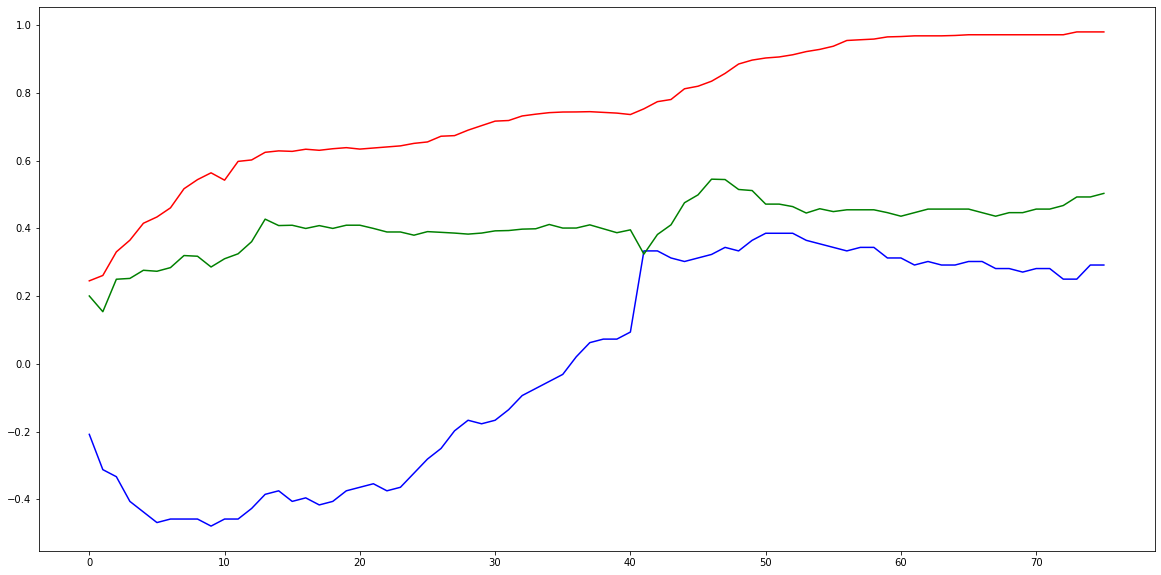

In [154]:
plt.figure(figsize = (20, 10))

"""
portfolio ditribution good - portfolio distribution bad where good is top 25% classes (0, 1, 2, 3, 4) and bad is bottom 25 %(15, 16, 17, 18, 19)

"""

plt.plot(np.array([np.sum(np.array_split(reshaped_eval[j][2][8], 4), 1) for j in range(76)])[:,0] - np.array([np.sum(np.array_split(reshaped_eval[j][2][8], 4), 1) for j in range(76)])[:,3], "b")
plt.plot(np.array([np.sum(np.array_split(reshaped_train[j][2][8], 4), 1) for j in range(76)])[:,0] - np.array([np.sum(np.array_split(reshaped_train[j][2][8], 4), 1) for j in range(76)])[:,3], "r")
plt.plot(np.array([np.sum(np.array_split(reshaped_prev[j][2][8], 4), 1) for j in range(76)])[:,0] - np.array([np.sum(np.array_split(reshaped_train[j][2][8], 4), 1) for j in range(76)])[:,3], "g")

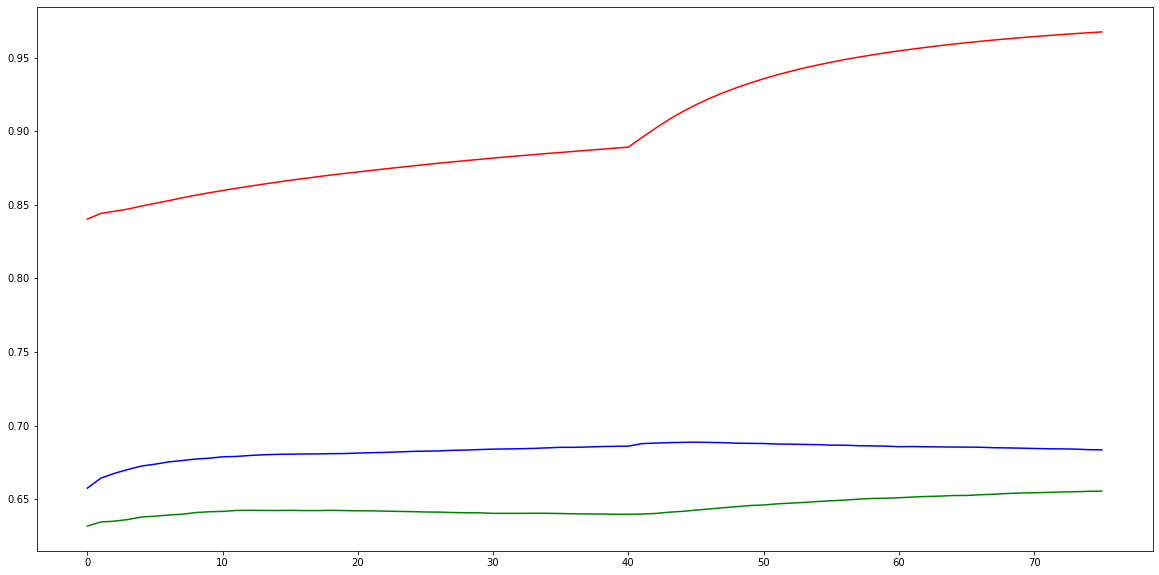

In [48]:
plt.figure(figsize = (20, 10))
"""
My Auc
"""

plt.plot([np.trapz(np.array(reshaped_eval[i][1])[:,1][::-1], np.array(reshaped[i][1])[:,0][::-1]) for i in range(76)], "b")

plt.plot([np.trapz(np.array(reshaped_train[i][1])[:,1][::-1], np.array(reshaped[i][1])[:,0][::-1]) for i in range(76)], "r")
reshaped = np.reshape(results[date_num][col_num][5], (-1, 5))
plt.plot([np.trapz(np.array(reshaped_prev[i][1])[:,1][::-1], np.array(reshaped[i][1])[:,0][::-1]) for i in range(76)], "g")


In [ ]:
plt.figure(figsize = (20, 10))

"""
Logloss
"""

plt.plot(reshaped_eval[:,0], "b")

plt.plot(reshaped_train[:,0], "r")

plt.plot(reshaped_prev[:,0], "g" )


In [ ]:
plt.figure(figsize = (20, 10))

"""
Gmetric
"""


plt.plot([reshaped_eval[j][4][-1] for j in range(76)], "b")

plt.plot([reshaped_train[j][4][-1] for j in range(76)], "r")

plt.plot([reshaped_prev[j][4][-1] for j in range(76)], "g" )